In [4]:
# Put project root in front of PYTHONPATH so that the local
# `tfcpn` module is used instead of a version installed with
# a package manager.
import sys
sys.path.insert(0, '..')

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tfcpn.inference import CPNPoseEstimator
from tfcpn.visualize import draw_skeleton

In [16]:
checkpoint_path = os.path.expanduser('~/models/tf-cpn/COCO.res50.256x192.CPN/snapshot_350.ckpt')
pose_estimator = CPNPoseEstimator(checkpoint_path)

INFO:tensorflow:Restoring parameters from /Users/asprenger/models/tf-cpn/COCO.res50.256x192.CPN/snapshot_350.ckpt


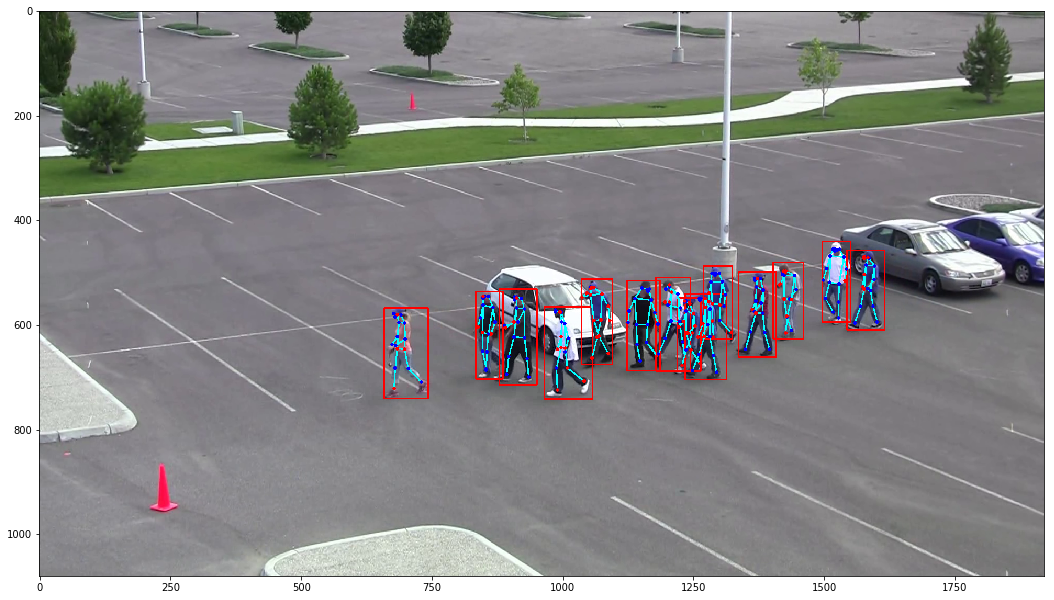

In [17]:
# load image
image_path = os.path.expanduser('~/Pictures/parking.png')
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
output_image = image.copy()

# load bboxes and scores
person_bboxes = np.load('/tmp/person_bboxes.npy')
bboxes = person_bboxes[:, 0:4].astype(np.int32)
bbox_scores = person_bboxes[:, 4]

bboxes_with_score, poses = pose_estimator.inference(image, bboxes, bbox_scores)

# bboxes_with_score: (nb_bboxes, 5), same bboxe coordinates as in bbox, different order
# poses: (nb_boxes, 17, 3), keypoint coordinate and score, note that all keypoints are always present

# draw bboxes
for bb in bboxes:
    cv2.rectangle(output_image, (bb[0], bb[1]), (bb[2], bb[3]), (255,0,0), 2)

# draw keypoints    
for keypoints in poses:
    draw_skeleton(output_image, keypoints, show_skeleton_labels=False)    
    
plt.figure(figsize=(18,18))
plt.imshow(output_image)
plt.show()


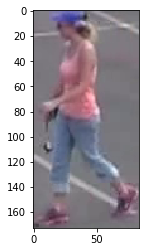

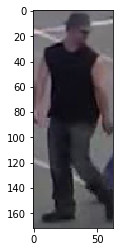

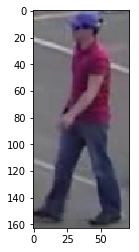

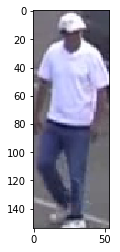

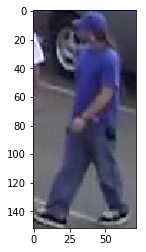

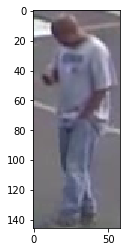

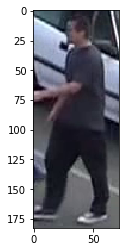

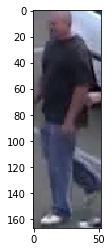

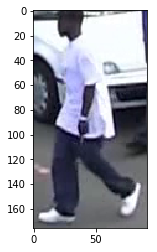

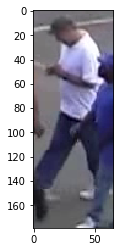

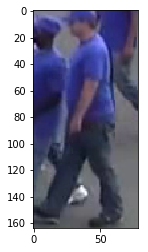

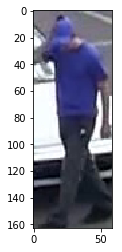

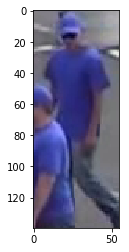

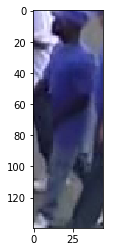

In [18]:
output_image = image.copy()

for bb in bboxes:
    bbox_crop = output_image[bb[1]:bb[3], bb[0]:bb[2], :]
    plt.imshow(bbox_crop)
    plt.show()
